## Evaluate models performance using cross_val_score

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold , StratifiedKFold , cross_val_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = load_iris()

In [3]:
X = df.data
y = df.target

## Build the models

In [4]:
log = LogisticRegression()
svc = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()

models = []
models.append(["SupportVector", svc])
models.append(["RandomForest", rfc])
models.append(["DecisionTree", dtc])
models

[['SupportVector', SVC()],
 ['RandomForest', RandomForestClassifier()],
 ['DecisionTree', DecisionTreeClassifier()]]

In [5]:
cv = 20
avg_scores = []
model_scores = []

for model_name , model in models:
    score = cross_val_score(model, X, y, cv=cv)
    avg_score = np.mean(score)
    
    model_scores.append([model_name, score])
    avg_scores.append([model_name, avg_score])
    
avg_scores = pd.DataFrame(avg_scores, columns=["Model", "Score"])

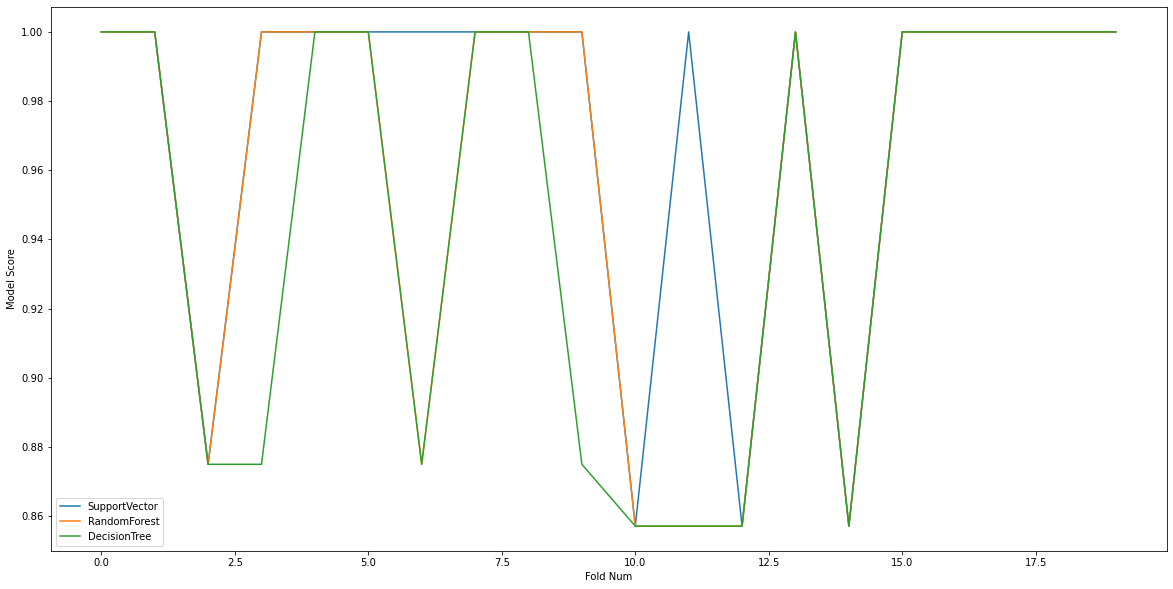

In [6]:
plt.figure(figsize=(20,10))

plt.plot(model_scores[0][1], label=model_scores[0][0])
plt.plot(model_scores[1][1], label=model_scores[1][0])
plt.plot(model_scores[2][1], label=model_scores[2][0])

plt.xlabel("Fold Num")
plt.ylabel("Model Score")
plt.legend(loc="lower left")

plt.show()

<BarContainer object of 3 artists>

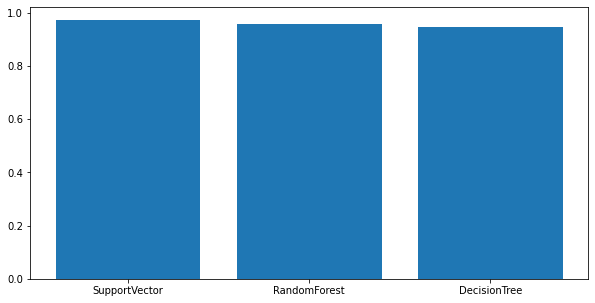

In [7]:
plt.figure(figsize=(10,5))

plt.bar(avg_scores["Model"], avg_scores["Score"])